# Project Business Statistics: E-news Express


## 1. PREP

### 1.1. Import all the necessary libraries

In [1]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

In [2]:
!pip list | grep numpy
!pip list | grep pandas
!pip list | grep matplotlib
!pip list | grep seaborn
!pip list | grep plotly.express
!pip list | grep stats

numpy                                 2.0.2
geopandas                             1.1.1
pandas                                2.2.2
pandas-datareader                     0.10.0
pandas-gbq                            0.29.2
pandas-stubs                          2.2.2.240909
sklearn-pandas                        2.2.0
matplotlib                            3.10.0
matplotlib-inline                     0.1.7
matplotlib-venn                       1.1.2
seaborn                               0.13.2
statsmodels                           0.14.5
xarray-einstats                       0.9.1


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [3]:
# importing necessary libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway

from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import chi2_contingency

# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

### 1.2. Reading the Data into a DataFrame

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Education/DBA AI/M07 Business statistics/project 07_short name/abtest.csv')

In [6]:
# creating a bit column for the 'converted' column
df['converted_bit'] = df['converted'].map({'yes': 1, 'no': 0})

### 1.3. Globals

In [7]:
# setting the alpha (significance level) as per the problem statement
gbl_alpha = 0.05

## 2. EDA

### 2.1. Data Overview

- Viewing the first and last few rows of the dataset
- Checking the shape of the dataset
- Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [8]:
# first 5 rows of dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,converted_bit
0,546592,control,old,3.48,no,Spanish,0
1,546468,treatment,new,7.13,yes,English,1
2,546462,treatment,new,4.40,no,Spanish,0
3,546567,control,old,3.02,no,French,0
4,546459,treatment,new,4.75,yes,Spanish,1


In [9]:
# last 5 rows of dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred,converted_bit
95,546446,treatment,new,5.15,no,Spanish,0
96,546544,control,old,6.52,yes,English,1
97,546472,treatment,new,7.07,yes,Spanish,1
98,546481,treatment,new,6.20,yes,Spanish,1
99,546483,treatment,new,5.86,yes,English,1


In [10]:
print(f"The dataset has {df.shape[0]} rows and {df.shape[1]} columns.")

The dataset has 100 rows and 7 columns.


In [11]:
# statistical summary
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
converted_bit,100.0,NaN,NaN,NaN,0.54,0.500908,0.0,0.0,1.0,1.0,1.0


- The dataset contains 100 observations with no missing values, which is consistent with the problem statement.
- The A/B test is confirmed to be properly set up with 50 users each in the control and treatment groups.
- Time Spent on Page: The average time spent is approximately 5.38 minutes. The median (5.42 minutes) is very close to the mean, suggesting the distribution is fairly symmetrical.
- Overall Conversion: The total conversion rate for the entire experiment is 54% (54 out of 100 users converted).
- Language Distribution: The three preferred languages are not perfectly balanced, with Spanish being the most frequent choice.

In [12]:
# checking for missing values
print(f"there are {df.isnull().sum().sum()} missing values in the dataset.")

there are 0 missing values in the dataset.


In [13]:
#checking for duplicate values
print(f"there are {df.duplicated().sum()} duplicate values in the dataset.")

there are 0 duplicate values in the dataset.


### 2.2. Univariate Analysis

#### 2.2.1. time spent on the page

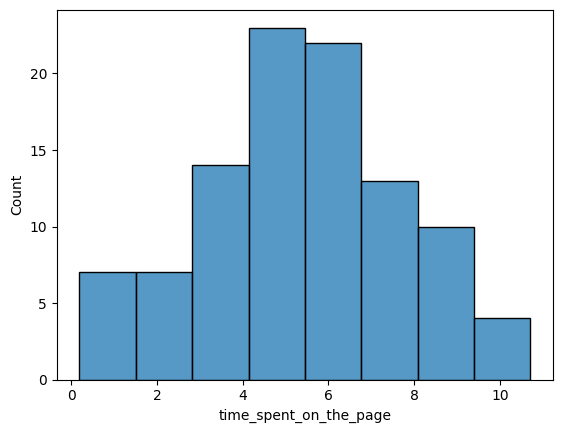

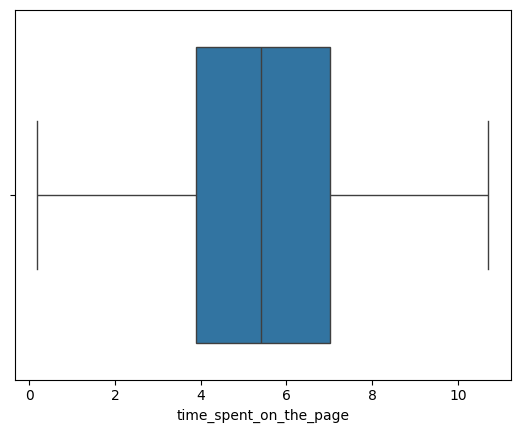

In [44]:
# histogram
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
# box plot
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

The histogram shows a roughly normal distribution centered around 5–6 minutes. Most users spend between 4 and 8 minutes on the page.

The data is fairly symmetric with no major outliers. Median is near 6 minutes, and the IQR spans ~4 to 7.5 minutes.

Users tend to spend a consistent amount of time on the page, making this a good metric for comparing engagement across groups.

#### 2.2.2. group

In [15]:
df['group'].value_counts()

,count
group,
control,50
treatment,50


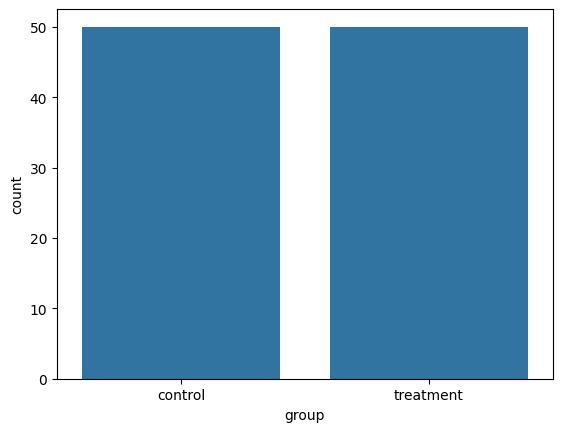

In [16]:
sns.countplot(data=df,x='group')
plt.show()

The observations were perfectly split into the 'control' and 'treatment' groups.

#### 2.2.3. landing page

In [17]:
df['landing_page'].value_counts()

,count
landing_page,
old,50
new,50


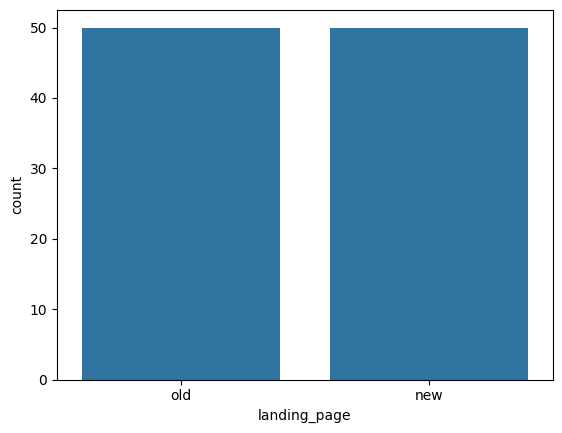

In [18]:
sns.countplot(data=df,x='landing_page')
plt.show()

The observations were perfectly split into the 'new' and 'old' pages, as per suggested by the 'control' and 'treatment' groups.

#### 2.2.4. converted

In [19]:
df['converted'].value_counts()

,count
converted,
yes,54
no,46


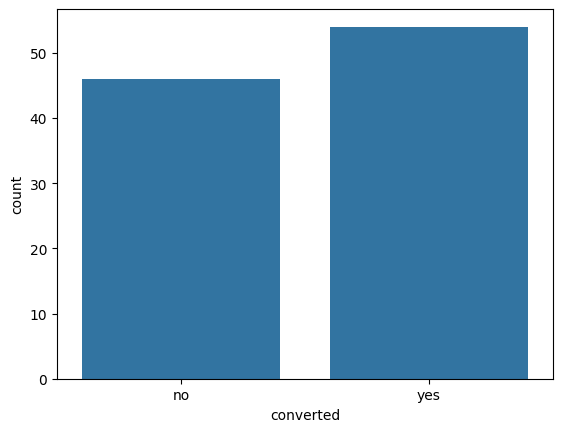

In [20]:
sns.countplot(data=df,x='converted')
plt.show()

Conversion status is nearly evenly distributed between converted and not-converted

#### 2.2.5. language preferred

In [21]:
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


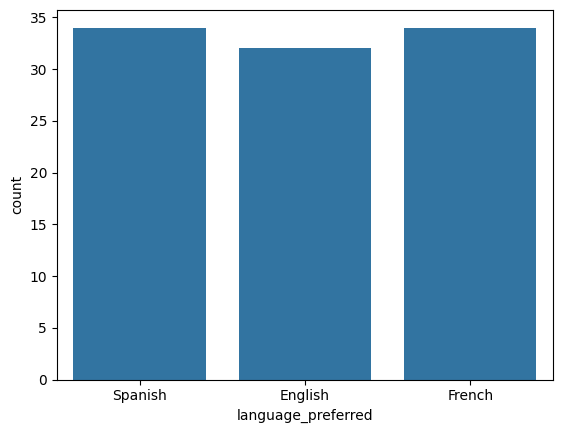

In [22]:
sns.countplot(data=df,x='language_preferred');

The 'language_preferred' is almost distributed evenly across the observations

### 2.3. Bivariate Analysis

#### 2.3.1. conversion per landing page

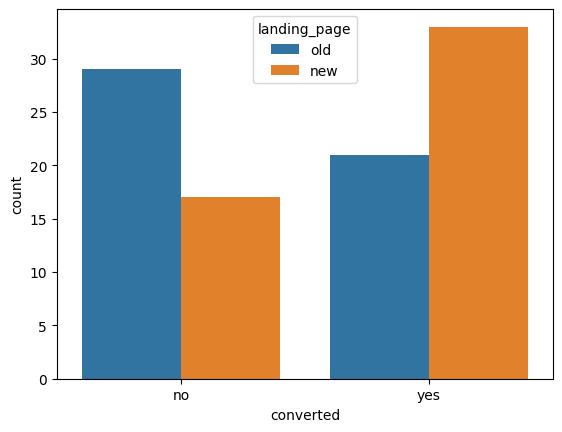

In [23]:
sns.countplot(data=df,x='converted',hue='landing_page');

- A larger number of users converted on the new landing page compared to the old one.
- The new page not only has more conversions, but also fewer non-conversions, suggesting better performance overall.
- Early visual evidence supports the new landing page as being more effective at driving conversions.

#### 2.3.2. conversion per group

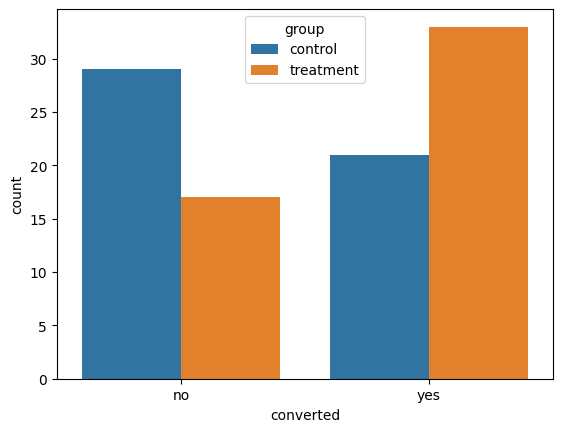

In [24]:
sns.countplot(data=df, x='converted', hue='group');

- The treatment group (new page) shows more conversions and fewer non-conversions compared to the control group.
- This aligns with expectations—users exposed to the treatment (new design) convert more often, suggesting it's more persuasive.
- This visual reinforces the positive impact of the treatment page on user conversion behavior.

#### 2.3.3. landing_page vs time spent on page, colored by conversion

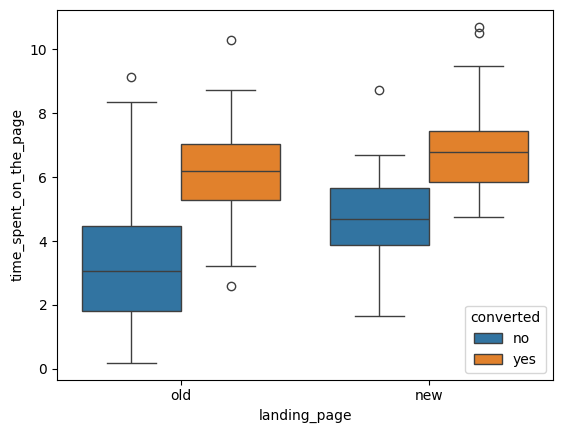

In [25]:
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page', hue='converted');

- Time Spent and Conversion: Users who converted ('yes') consistently spent more time on the landing page than those who did not ('no'), for both the old and new pages.

- New vs. Old Page: The distributions for time_spent_on_the_page on the new landing page (both for converted and non-converted users) are visibly shifted upwards compared to the old page. This suggests the new page is more engaging.

- Outliers: The presence of outliers in all four categories (some users spending exceptionally long or short times) should be noted.

#### 2.3.4. conversion per language

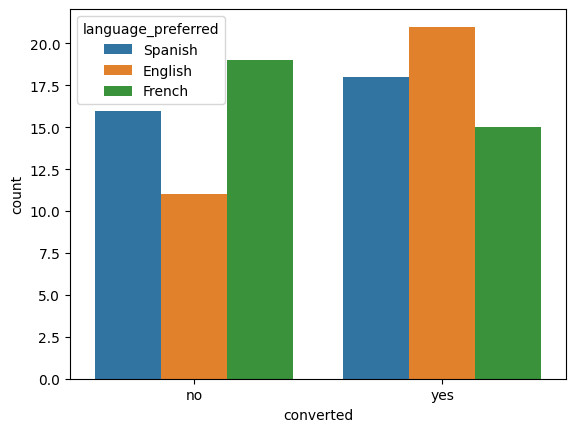

In [26]:
sns.countplot(data=df, x='converted', hue='language_preferred');

- Overall Distribution: There seems to be a roughly equal split between users who converted ('yes') and those who did not ('no').
- Non-Converted Users: Among users who did not convert, French-speaking users make up the largest group, followed by Spanish, and then English.
- Converted Users: Among users who did convert, English-speaking users make up the largest group, followed by Spanish, and then French. This is an interesting reversal of the trend for non-converted users.
- Language Proportions: The proportion of converted users seems to be highest for English speakers and lowest for French speakers.

#### 2.3.5. time_spent_on_page per language, colored by conversion

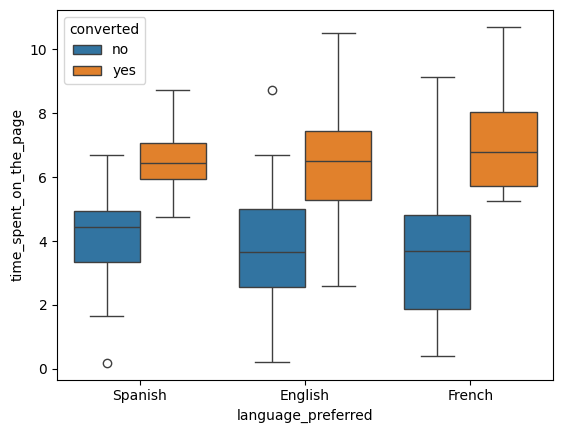

In [27]:
sns.boxplot(data=df,x='language_preferred',y='time_spent_on_the_page', hue='converted');

- Conversion & Time: Regardless of the language, users who converted spent significantly more time on the page than those who did not.

- Language Differences: Among converted users, those who preferred French and Spanish had a slightly higher median time spent compared to English users. For non-converted users, the median time spent was relatively similar across all languages.

- Outliers: A few outliers are present across the different language and conversion groups.

#### 2.3.6. time_spent_on_page per group, colored by conversion

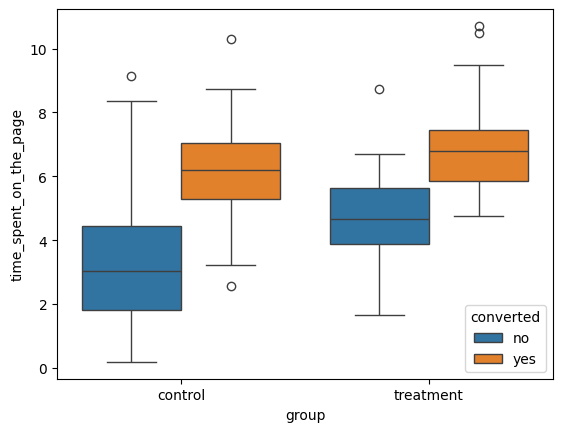

In [28]:
sns.boxplot(data=df,x='group',y='time_spent_on_the_page', hue='converted');

- Time and Conversion: For both the control and treatment groups, users who converted ('yes') spent a significantly longer time on the page than those who did not.
- Treatment vs. Control: The median time spent for both converted and non-converted users in the treatment group is visibly higher than in the control group. This suggests that the new landing page is more effective at engaging users.
- Outliers: A few outliers are present across all four categories.

## 3. QUESTIONS

### >> 3.1. Do the users spend more time on the new landing page than the old landing page?

#### 3.1.1. Visual Analysis

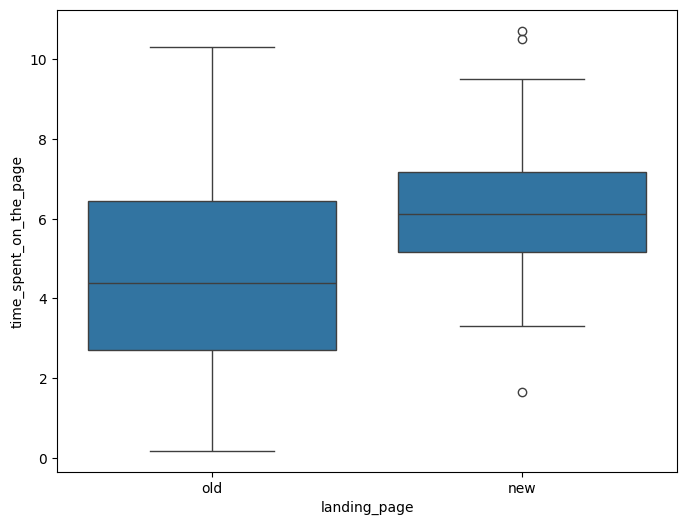

In [29]:
# visual analysis of the time spent on the new page and the time spent on the old page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', data = df);

#### 3.1.2. Define hypotheses

Let
\begin{align*}
\mu_{\text{new}} &= \text{Mean time spent on the new landing page} \\
\mu_{\text{old}} &= \text{Mean time spent on the old landing page}
\end{align*}


\begin{align*}
H_0 &: \mu_{\text{new}} \leq \mu_{\text{old}} \quad \text{(Users do not spend more time on the new page)} \\
H_a &: \mu_{\text{new}} > \mu_{\text{old}} \quad \text{(Users spend more time on the new page)}
\end{align*}


#### 3.1.3. Select Appropriate test

This is a ***one-tailed independent two-sample t-test***, because we are comparing the sample means from 2 independent populations when std devs are unknown


#### 3.1.4. Decide the significance level

significance level is 5% as indicated by the problem statement

#### 3.1.4. Collect and prepare data

We will first check for the equality of variances

Average time spent (Old Page): 4.53
Average time spent (New Page): 6.22


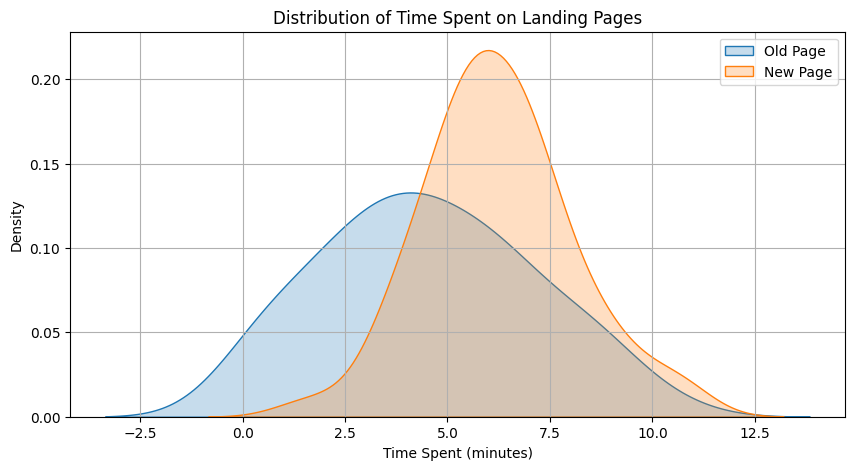

In [30]:
# Separate groups based on landing_page
old_page_time = df[df['landing_page'] == 'old']['time_spent_on_the_page']
new_page_time = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# Descriptive statistics
print("Average time spent (Old Page):", round(old_page_time.mean(), 2))
print("Average time spent (New Page):", round(new_page_time.mean(), 2))

# Visual check of distributions
plt.figure(figsize=(10, 5))
sns.kdeplot(old_page_time, label='Old Page', fill=True)
sns.kdeplot(new_page_time, label='New Page', fill=True)
plt.title("Distribution of Time Spent on Landing Pages")
plt.xlabel("Time Spent (minutes)")
plt.legend()
plt.grid(True)
plt.show()


In [31]:
# Levene’s test for equality of variances
levene_stat, levene_p = stats.levene(old_page_time, new_page_time)
equal_var = levene_p > gbl_alpha
print("Levene’s test p-value:", round(levene_p, 4))
print("Assume equal variances?", equal_var)

Levene’s test p-value: 0.009
Assume equal variances? False


#### 3.1.5. Calculate the p-value

In [32]:
# One-tailed t-test (new page > old page)
test_stat, p_value = stats.ttest_ind(
    new_page_time,
    old_page_time,
    equal_var=equal_var,
    alternative='greater'
)

# Final output
print("\nT-statistic:", round(test_stat, 4))
print("One-tailed p-value:", round(p_value, 4))



T-statistic: 3.7868
One-tailed p-value: 0.0001


#### 3.1.6. Compare the p-value with $\alpha$

In [33]:
if p_value < gbl_alpha:
    print("As the p-value is less than the level of significance, we reject the null hypothesis")
else:
    print("As the p-value is greater than the level of significance, we fail to reject the null hypothesis")

As the p-value is less than the level of significance, we reject the null hypothesis


#### 3.1.7. Inference

There’s enough statistical evidence that users spend more time on the new page, suggesting it’s more engaging—likely due to better layout, content, or overall user experience. This supports the design team's direction.

### >> 3.2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

#### 3.2.1. Visual analysis

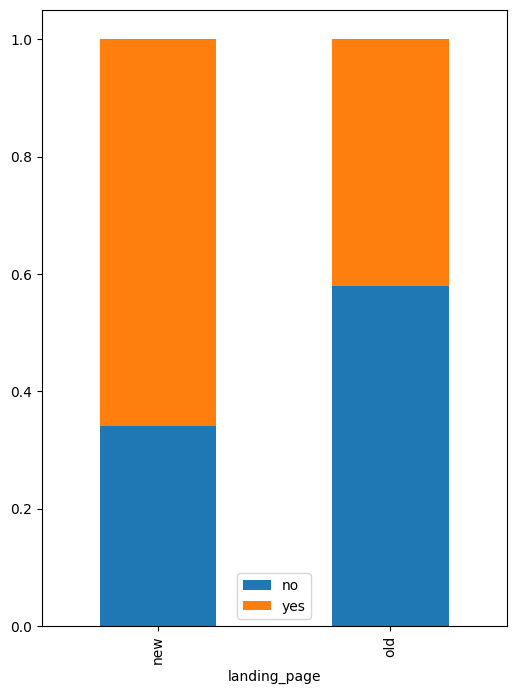

In [34]:
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()


In [35]:
print(df['converted'].unique())
print(df['converted'].value_counts())


['no' 'yes']
converted
yes    54
no     46
Name: count, dtype: int64


#### 3.2.2. Define hypotheses

\begin{align*}
H_0 &: p_{\text{new}} \leq p_{\text{old}} \quad \text{(The new page is not more effective)} \\
H_a &: p_{\text{new}} > p_{\text{old}} \quad \text{(The new page has a higher conversion rate)}
\end{align*}


#### 3.2.3. Select appropiate test

Our chosen test is a "2-sample z-test for proportions (one-tailed)" because we're comparing proportions (conversion rates) of two independent groups. It's a two-sample z-test for proportions
And specifically, it's a one-tailed test because we're testing if the new page's conversion rate is greater

#### 3.2.4. Calculate the p-value

In [36]:

# Count conversions and total users per landing page
conversion_counts = df.groupby('landing_page')['converted_bit'].agg(['sum', 'count'])
converted = conversion_counts['sum'].values  # number of conversions
nobs = conversion_counts['count'].values     # total observations

# Perform 1-tailed 2-sample z-test (new > old, so alternative = 'larger')
z_stat, p_value = proportions_ztest(count=converted, nobs=nobs, alternative='larger')

# Print results
print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Z-statistic: 2.4077
P-value: 0.0080


#### 3.2.5. Compare the p-value with $\alpha$

In [37]:
# Decision at 5% significance level as suggested by problem statement
if p_value < gbl_alpha:
    print("Reject the null hypothesis: The new landing page has a significantly higher conversion rate.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that the new page performs better.")

Reject the null hypothesis: The new landing page has a significantly higher conversion rate.


#### 3.2.6. Inference

There is enough statistical evidence to conclude that The new landing page leads to a higher conversion rate than the old one.

This suggests that implementing the new design could result in more user sign-ups/subscriptions, and is likely the better option from a business standpoint.

### >> 3.3. Does the converted status depend on the preferred language?

#### 3.3.1. Visual analysis

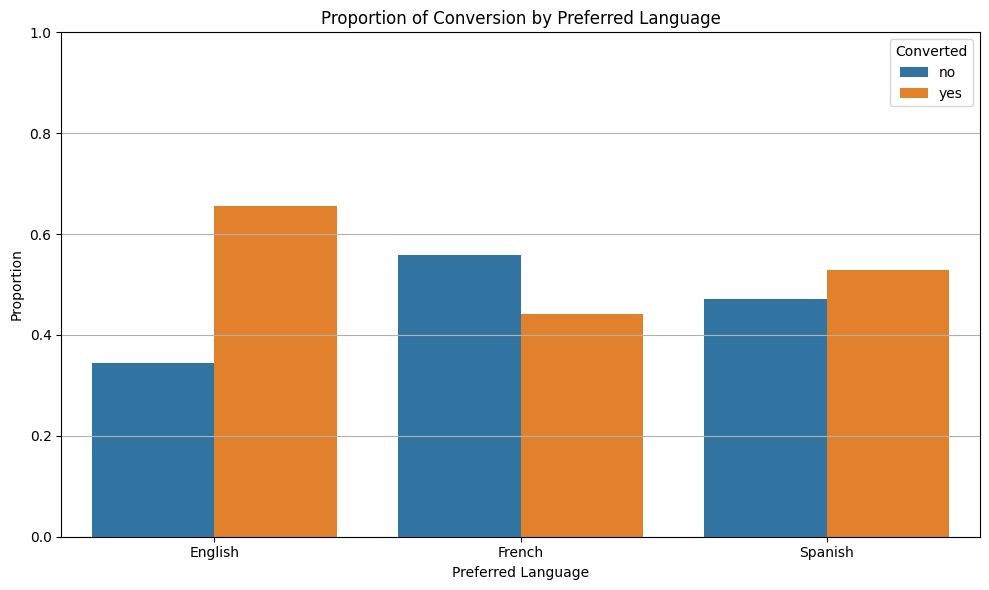

In [38]:
# Create a contingency table (counts of converted vs not by language)
conversion_counts = pd.crosstab(df['language_preferred'], df['converted'])

# Normalize the counts to get conversion rate per language
conversion_props = conversion_counts.div(conversion_counts.sum(axis=1), axis=0)

# Reset index for plotting
conversion_props = conversion_props.reset_index().melt(id_vars='language_preferred',
                                                        var_name='converted',
                                                        value_name='proportion')

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x='language_preferred',
    y='proportion',
    hue='converted',
    data=conversion_props
)

plt.title('Proportion of Conversion by Preferred Language')
plt.xlabel('Preferred Language')
plt.ylabel('Proportion')
plt.ylim(0, 1)
plt.legend(title='Converted')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### 3.3.2. Define hypotheses

\begin{aligned}
H_0\!: & \quad \text{`converted` and `language_preferred` are independent} \\
H_1\!: & \quad \text{`converted` and `language_preferred` are dependent}
\end{aligned}


#### 3.3.3. Select appropriate test

To test whether `converted` and `language_preferred` are independent, we will use the Chi-Square Test of Independence, which is used to check wether categorical variables from a population are independent.

#### 3.3.4. Calculate the p-value

In [39]:
# Create a contingency table
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

# Perform Chi-Square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", round(chi2, 4))
print("Degrees of Freedom:", dof)
print("P-Value:", round(p_value, 4))

Chi-Square Statistic: 3.093
Degrees of Freedom: 2
P-Value: 0.213


#### 3.3.5. Compare the p-value with $\alpha$

In [40]:
# Decision at 5% significance level as suggested by problem statement
if p_value < gbl_alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


#### 3.3.6. Inference

The variables `converted` and `language_preferred` are likely independent in our sample — the conversion behavior is not strongly associated with the language users choose to view the landing page.

### >> 3.4. Is the mean time spent on the new page same for the different language users?

#### 3.4.1. Visual analysis

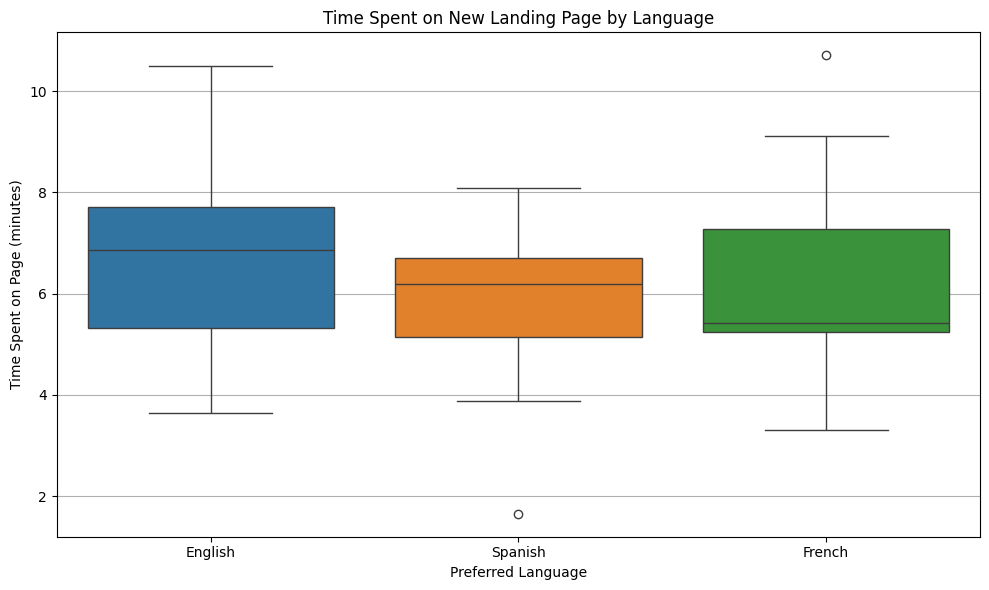

In [41]:

# Filter only users who saw the new landing page
new_page_df = df[df['landing_page'] == 'new']

# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=new_page_df,
    x='language_preferred',
    y='time_spent_on_the_page',
    hue = 'language_preferred'
)

# Add titles and labels
plt.title('Time Spent on New Landing Page by Language')
plt.xlabel('Preferred Language')
plt.ylabel('Time Spent on Page (minutes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


#### 3.4.2. Define hypotheses

Null Hypothesis $H_0​$: The mean time spent is the same for all language groups.

Alternative Hypothesis $H_1$​: The mean time spent is not the same for at least one language group.

\begin{aligned}
H_0\!: & \quad \mu_{\text{English}} = \mu_{\text{French}} = \mu_{\text{Spanish}} = \dots \\
H_1\!: & \quad \text{At least one } \mu_i \text{ is different}
\end{aligned}


#### 3.4.3. Select appropriate test

The correct statistical test is a one-way ANOVA because  this question involves comparing the means of a continuous variable (time_spent_on_the_page) across more than two groups (language_preferred categories)

#### 3.4.4. Calculate the p-value

In [42]:

# Filter the dataset for only the 'new' landing page
new_page_df = df[df['landing_page'] == 'new']

# Get the list of time values for each language group
groups = new_page_df.groupby('language_preferred')['time_spent_on_the_page'].apply(list)

# Perform the ANOVA test
f_stat, p_value = f_oneway(*groups)

# Display the results
print("F-Statistic:", round(f_stat, 4))
print("P-Value:", round(p_value, 4))


F-Statistic: 0.8544
P-Value: 0.432


#### 3.4.5. Compare the p-value with $\alpha$

In [43]:
# Decision at 5% significance level
if p_value < gbl_alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


#### 3.4.6. Inference

There is no statistically significant evidence to suggest that the mean time spent on the new landing page differs across language groups. This suggests that the language preference does not influence engagement (measured as time spent) on the new page.

## 4. CONCLUSIONS AND BUSINESS RECOMMENDATIONS

- Data is clean and balanced (100 users, 50/50 control vs. treatment).
- Users who convert spend more time on the page; time distribution is fairly normal.
- Treatment group consistently shows higher engagement across languages and conversions.

**Final Conclusions**

- New Landing Page Performs Better
Users spend more time and convert at a higher rate on the new landing page. This indicates improved engagement and effectiveness over the old version.

- Language Does Not Impact Conversion or Engagement
Both conversion rates and time spent on the page appear independent of users’ preferred language. The page performs consistently across English, Spanish, and French.

**Business Recommendations**

- Roll Out the New Landing Page
Given its superior performance in both engagement and conversion, the new page should be adopted as the default.

- No Immediate Need for Language-Specific Customization
Since language preference doesn’t significantly impact behavior, efforts can focus on improving the core content and layout, rather than localization tweaks.

- Continue Monitoring Over Time
Maintain A/B testing for future design changes to ensure continued optimization, and consider segmenting by other variables (device type, traffic source) for further insights.



___